In [12]:
import sys
sys.path.append('../mss')
import matplotlib.pyplot as plt
import pandas as pd
import visreader as mvis
import mssmain as mss
import numpy as np

In [2]:
path = 'D:/UW/mssvalidation/20201119_ENTACT_validation_data/20201117_ENTACT_505_1.mzML'
scans = mss.get_scans(path, ms_all=False, ms_lv=1)
#noise removal
mss.noise_removal(scans, 2000)

In [3]:
df = pd.read_csv('D:/UW/mssvalidation/20201119_ENTACT_validation_data/505_minscan5.csv')
d_val = pd.read_excel('D:/UW/mssvalidation/20201119_ENTACT_validation_data/ENTACT_information/NTA_DataReporting_UW_CUW_unblinded_internal.xlsx', sheet_name='505')

In [4]:
d_val = d_val[d_val['Ion Polarity'] == 'Positive']

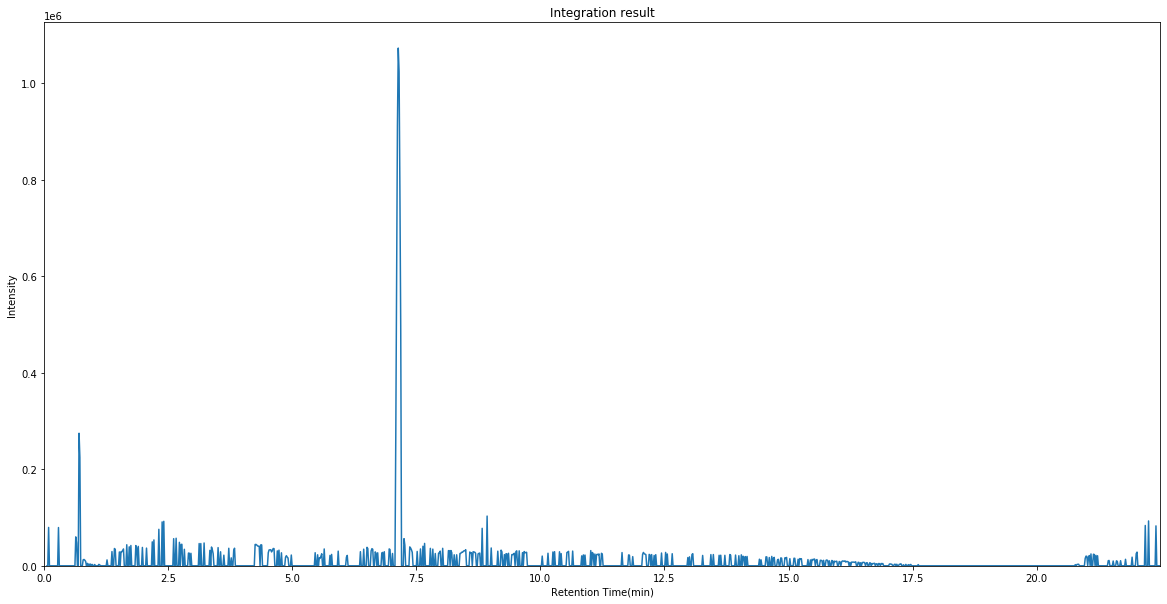

In [30]:
mvis.integration_plot(scans,194.1182,5)

ref mz:  145.0654 ref RT:  6.478
      Unnamed: 0       m/z    rt     sn  score     peak area
1643        1643  145.0617  6.54  3.184      2  4.840103e+04
1644        1644  145.0646  6.44  0.000      1  2.566826e+06
1646        1646  145.0675  4.96  0.000      3  9.313338e+04
1647        1647  145.0675  5.31  0.000      1  1.709989e+05


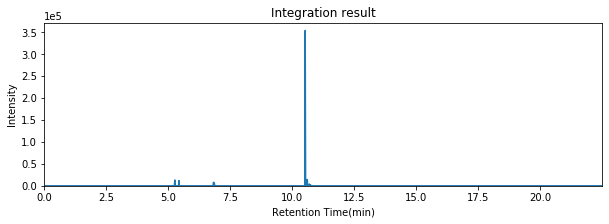

ref mz:  228.1284 ref RT:  8.437
      Unnamed: 0       m/z    rt     sn  score      peak area
5337        5337  228.1252  7.24  1.056      3   13141.815186
5340        5340  228.1389  8.26  0.000      1  546482.704224
Peak retention time: 6.27 minute, Peak area:  50757541.8


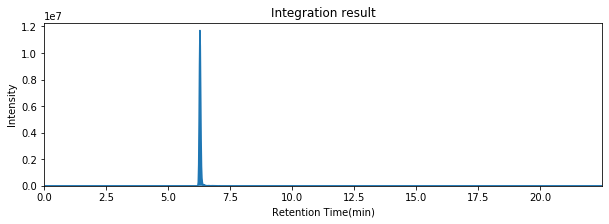

ref mz:  317.1648 ref RT:  10.469
      Unnamed: 0       m/z    rt     sn  score     peak area
9225        9225  317.1679  8.66  0.681      3  61600.925130
9226        9226  317.1679  8.86  0.611      3  77117.751221
9227        9227  317.1679  9.09  0.757      3  23072.399740
9229        9229  317.1742  9.94  1.180      3  42349.646932
Peak retention time: 8.38 minute, Peak area:  41029030.5


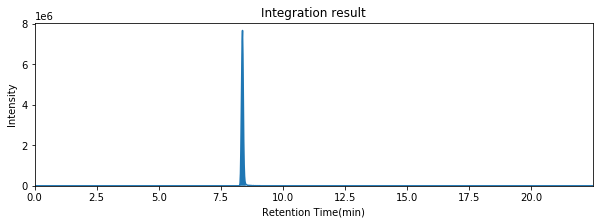

ref mz:  254.144 ref RT:  10.179
Empty DataFrame
Columns: [Unnamed: 0, m/z, rt, sn, score, peak area]
Index: []
Peak retention time: 7.92 minute, Peak area:  58683304.4


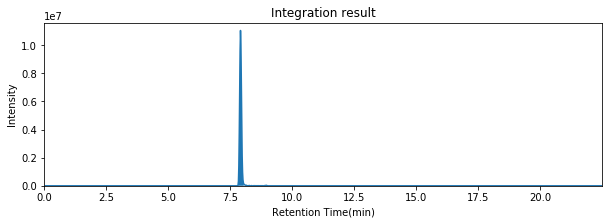

ref mz:  194.1182 ref RT:  7.18
      Unnamed: 0       m/z    rt   sn  score      peak area
3848        3848  194.1199  6.54  0.0      1  311684.148438


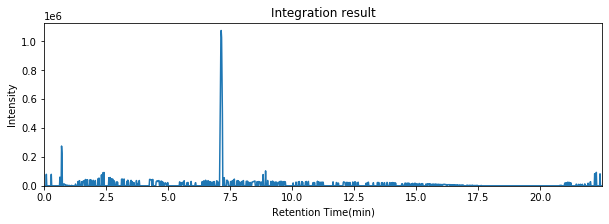

In [32]:
RT_error = 2
mz_error = 0.015
for i,row in d_val.iloc[50:55].iterrows():
    mz_ref = row['Reference mass'] + 1.0079
    rt_ref = row['RT']
    print('ref mz: ', mz_ref, 'ref RT: ', rt_ref)
    overlap = np.where(((abs(df['m/z'] - mz_ref) <= mz_error)) & ((abs(df['rt'] - rt_ref)) <= RT_error))
    print(df.loc[overlap])
    mvis.integration_plot(scans, mz_ref, 5,fig_w=10,fig_h=3)
    plt.show()
    d_val.at[i, 'test'] = i